In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from model_chain import run_chain_of_models, get_ace_date
from SA_tools.sobol import estimate_sobol
import datetime as dt
import astropy.units as u
from scipy.stats import pearsonr
from sunpy.coordinates.sun import carrington_rotation_time

In [2]:
import matplotlib
import matplotlib.dates as mdates
font = {'family' : 'serif',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

In [3]:
# set up carrington rotation
CR = "2053"
start_time = carrington_rotation_time(int(CR)).to_datetime()
end_time = carrington_rotation_time(int(CR)+1).to_datetime()

# get ace data
ACE_longitude, ACE_latitude, ACE_r, ACE_vr, ACE_obstime = get_ace_date(start_time=start_time, end_time=end_time)
ACE_vr_is_nan = np.isnan(ACE_vr)

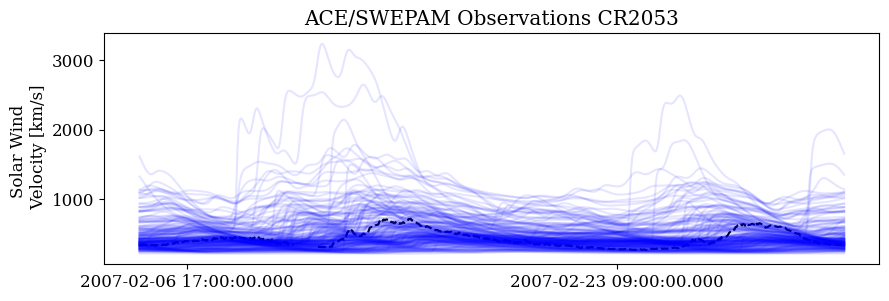

In [5]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(ACE_obstime.value, ACE_vr, c="k", ls="--")
ax.set_ylabel("Solar Wind \n Velocity [km/s]")
ax.set_title("ACE/SWEPAM Observations CR" + str(CR))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))


for ii in range(200):
    vr_hux_wsa_interp = np.load(file=os.getcwd() + "/SA_results/CR" + str(CR) + "/LHS" + "/simulation_output/A" + str(ii) + "/vr_hux_sample_A" + str(ii) + ".npy")
    ax.plot(ACE_obstime.value, vr_hux_wsa_interp, alpha=0.1, c="b")

In [6]:
# directory with results
dir_name = os.getcwd() + "/SA_results/CR" + str(CR) + "/LHS"
# number of MC simulations
N=int(1e4)
# number of parameters
d=11
# ACE data resolution
N_res = len(ACE_vr)

In [7]:
# initialize matrices.
YA_QoI = np.zeros((N, N_res))
YB_QoI = np.zeros((N, N_res))
YC_QoI = np.zeros((N, d, N_res))

In [9]:
for ii in range(N):
    try:
        YA_QoI[ii, :] = np.load(file=dir_name + "/simulation_output/A" + str(ii) + "/vr_hux_sample_A" + str(ii) + ".npy")
        YB_QoI[ii, :] = np.load(file=dir_name + "/simulation_output/B"+ str(ii) + "/vr_hux_sample_B" + str(ii) + ".npy")
    except:
        print(ii)

In [10]:
for ii in range(N):
     for jj in range(d):
        try:
            YC_QoI[ii, jj, :] = np.load(file=dir_name + "/simulation_output/C"+ str(ii) + "_" + str(jj) +"/vr_hux_sample_C" + str(ii) + "_" + str(jj) + ".npy")
        except:
            print(ii, jj)

In [11]:
np.save(file="SA_results/CR" + str(CR) + "/LHS/simulation_QoI_A", arr=YA_QoI)
np.save(file="SA_results/CR" + str(CR) + "/LHS/simulation_QoI_B", arr=YB_QoI)
np.save(file="SA_results/CR" + str(CR) + "/LHS/simulation_QoI_C", arr=YC_QoI)